## Wine Quality


The objective of the Wine Quality dataset is to predict the quality of different wines based on various physicochemical properties.
The goal is to build a machine learning model that can accurately predict the wine quality based on the input features.

The input features (independent variables) in the dataset include properties like:

Fixed acidity,
Volatile acidity,
Citric acid,
Residual sugar,
Chlorides,
Free sulfur dioxide,
Total sulfur dioxide,
Density,
pH,
Sulphates,
Alcohol.
The target variable (dependent variable) is:

Quality (score between 0 and 10)

Importing Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import matplotlib.pyplot as plt


## Import Data

In [5]:
df=pd.read_csv(r'/kaggle/input/whitewinequality/WhiteWineQuality.csv',sep=';')

Describe Data

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
df.shape

(4898, 12)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

## Data Visualization

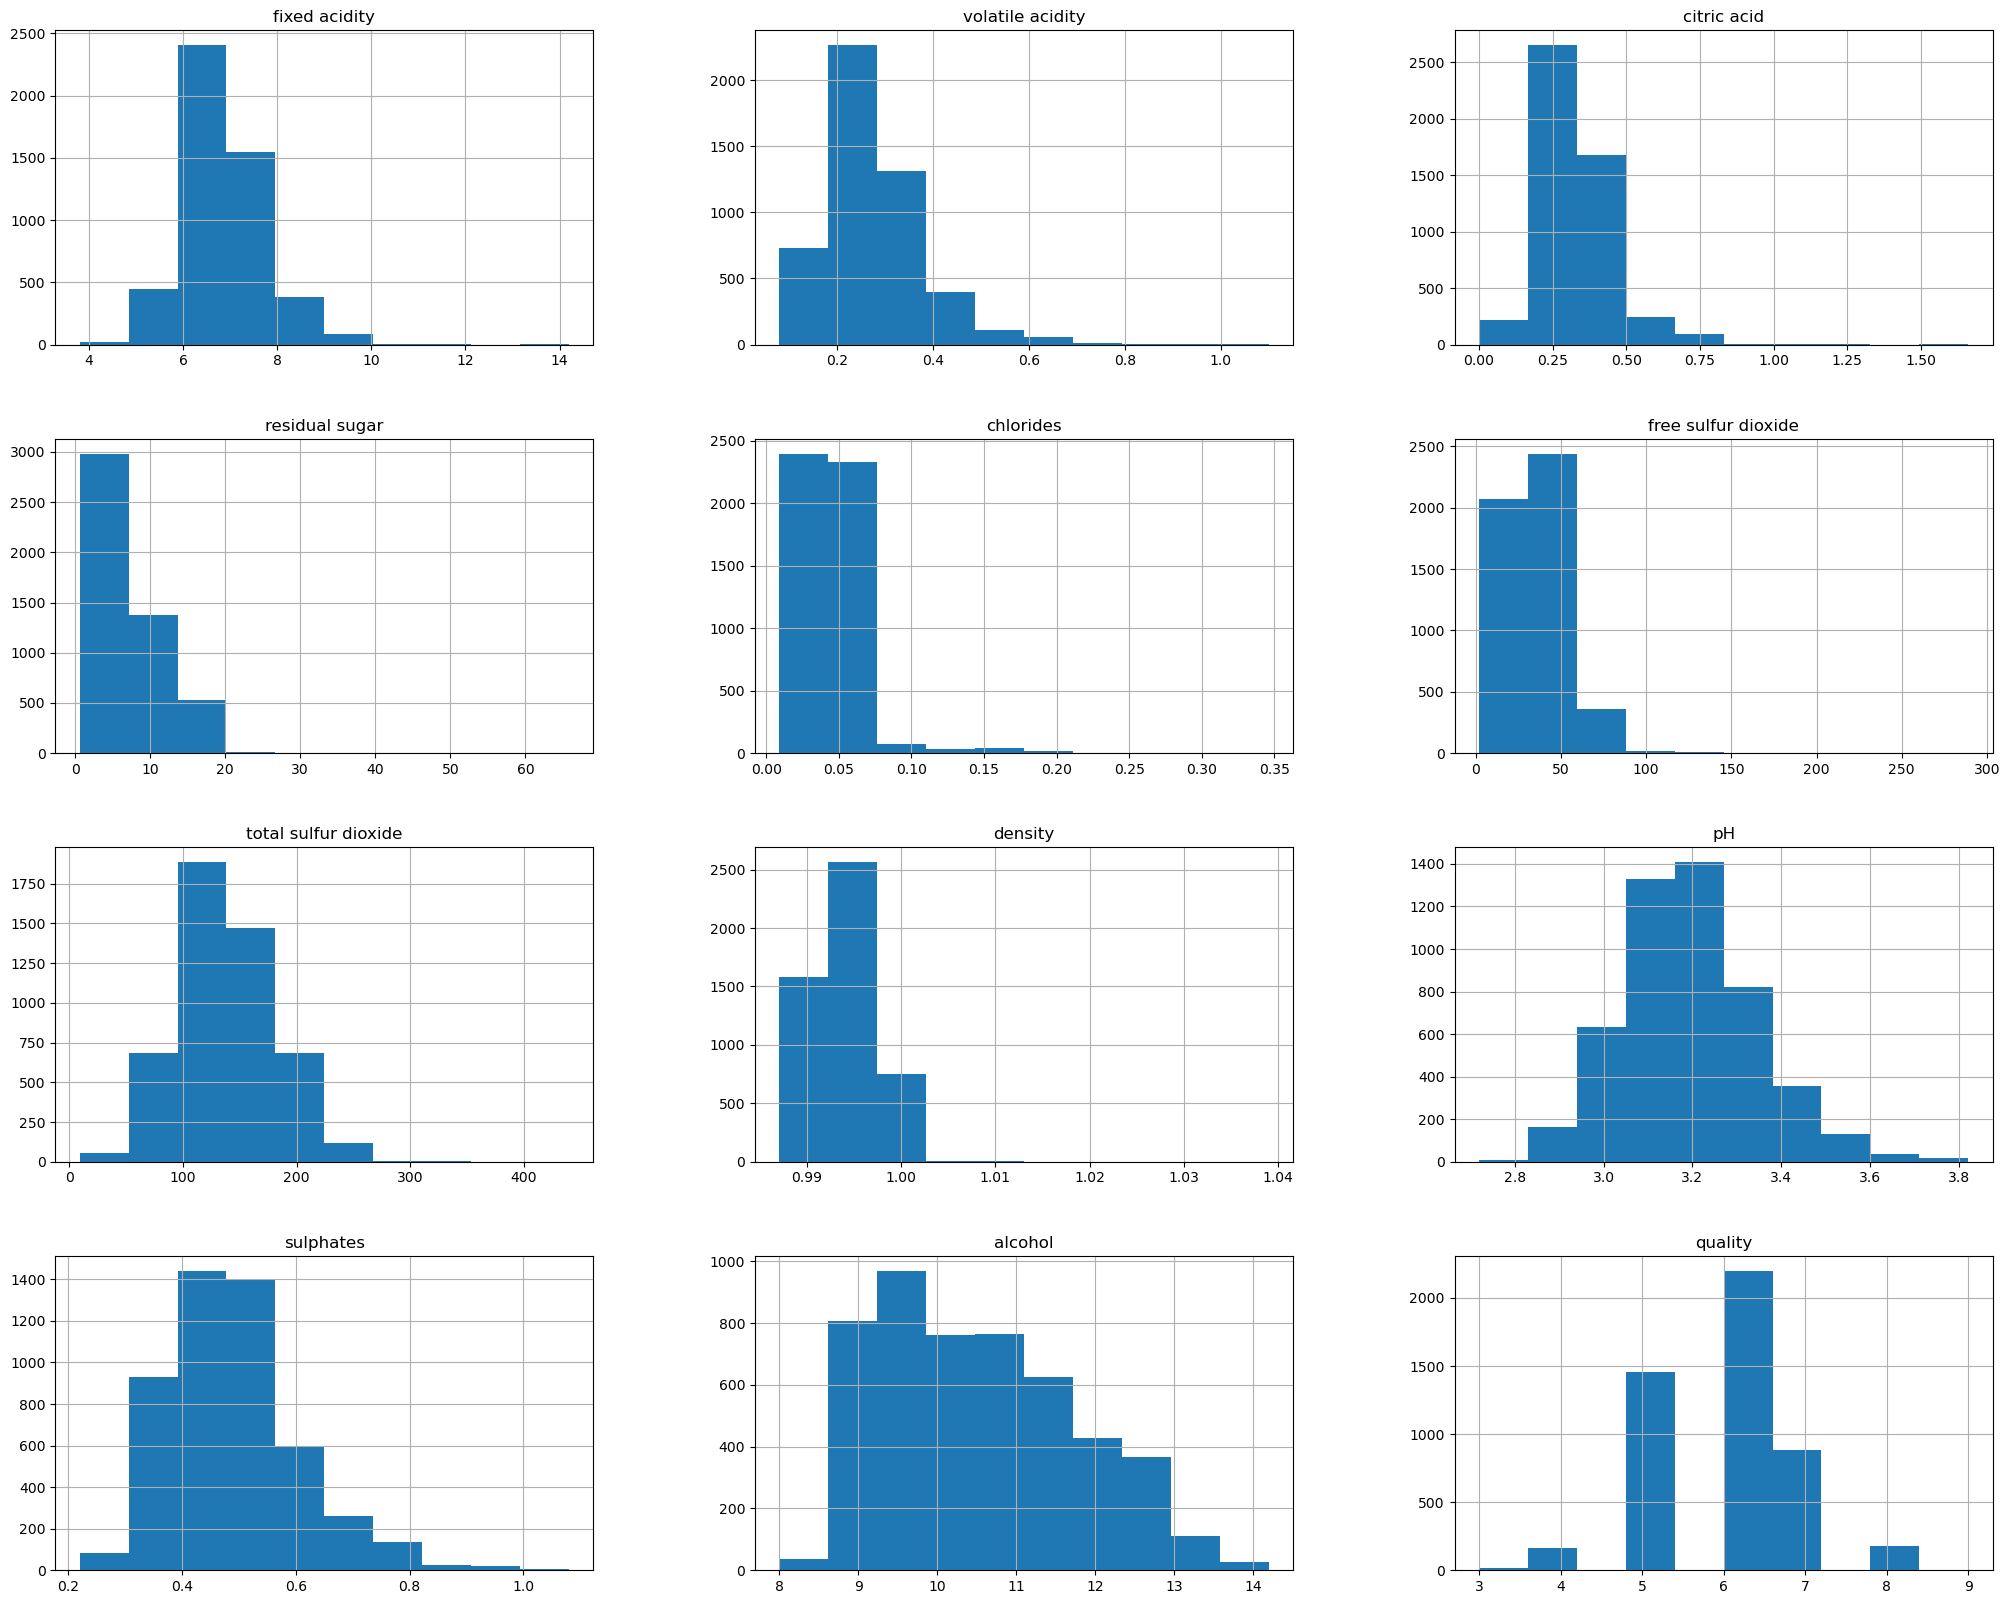

In [12]:
df.hist(figsize=(25,20))
plt.show()

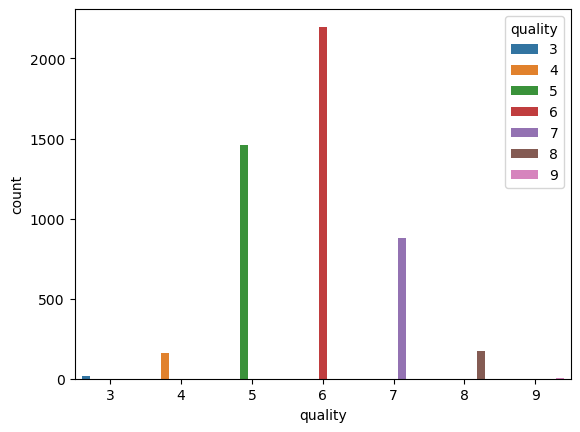

In [13]:
sns.countplot(data=df,x='quality',hue='quality')
plt.show()

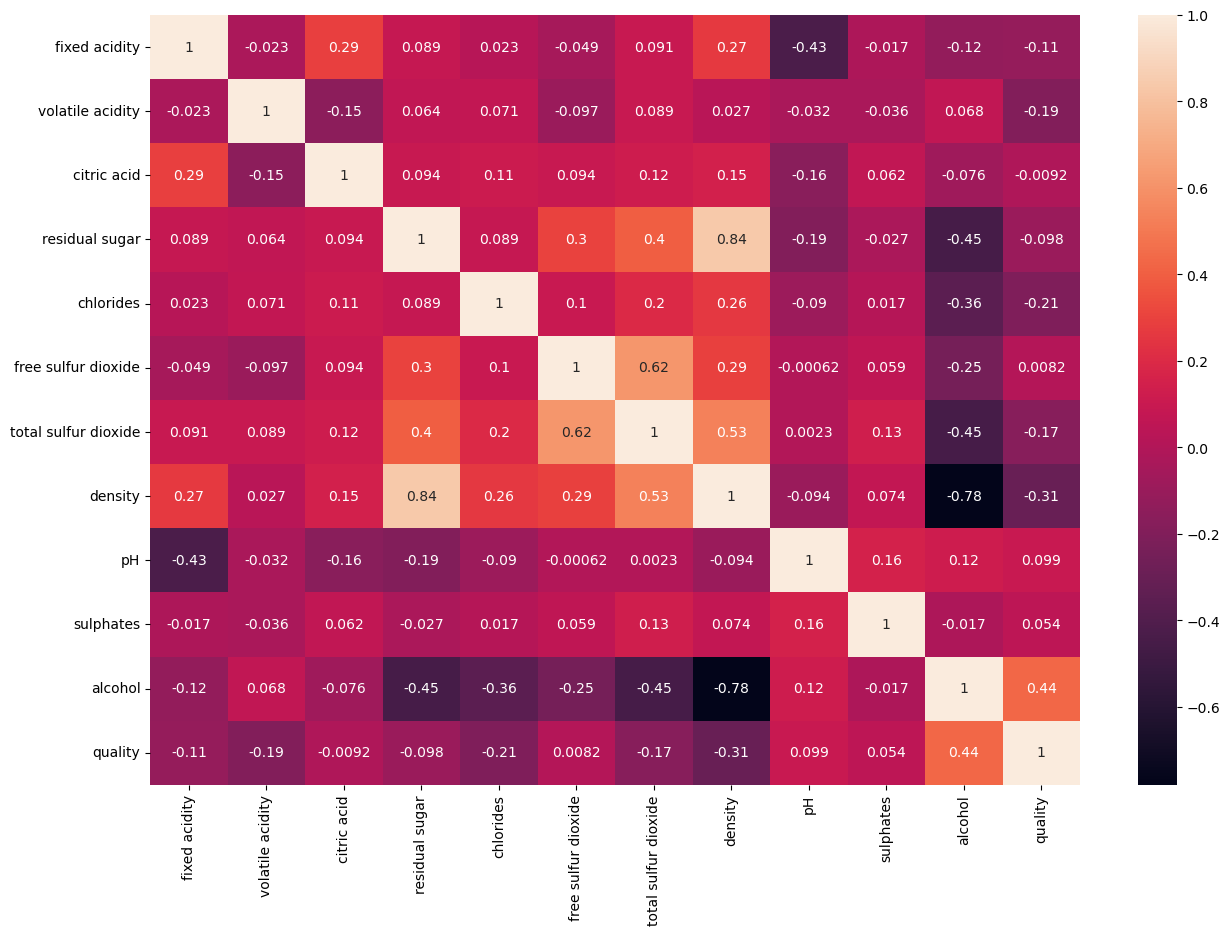

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data Preprocessing

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df.duplicated().sum()

937

In [17]:
df=df.drop_duplicates()

In [18]:
df.shape

(3961, 12)

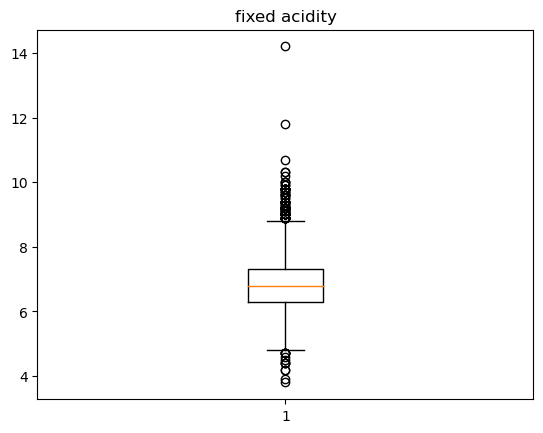

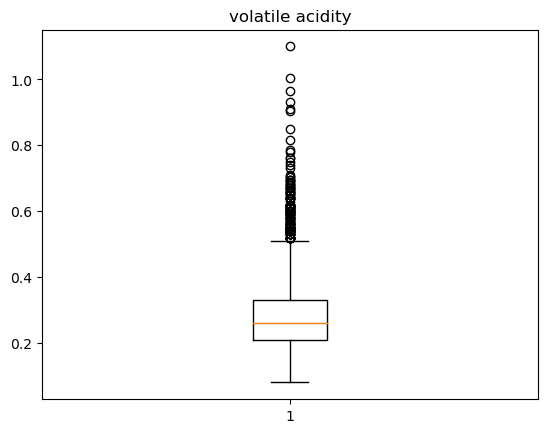

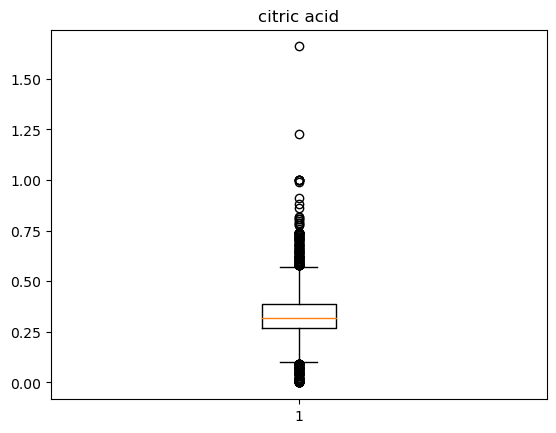

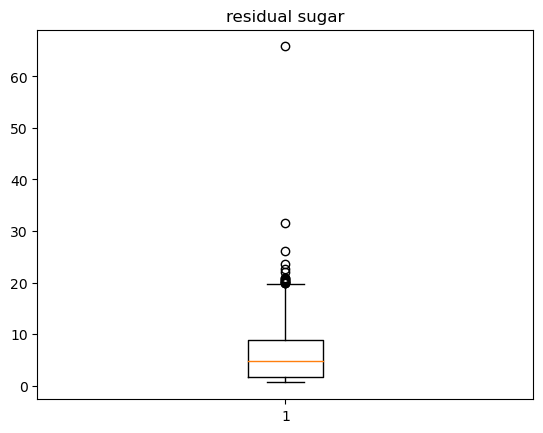

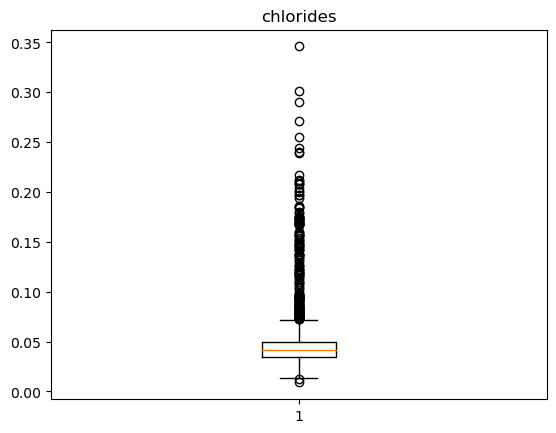

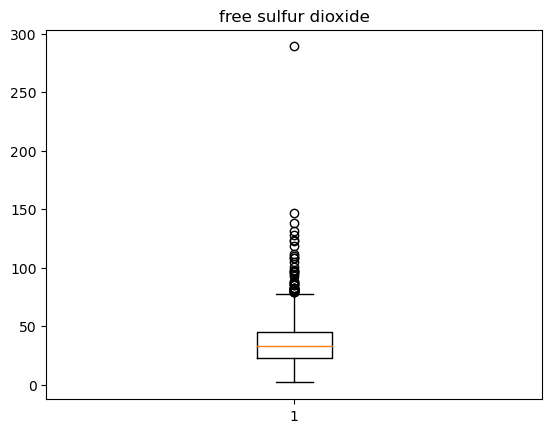

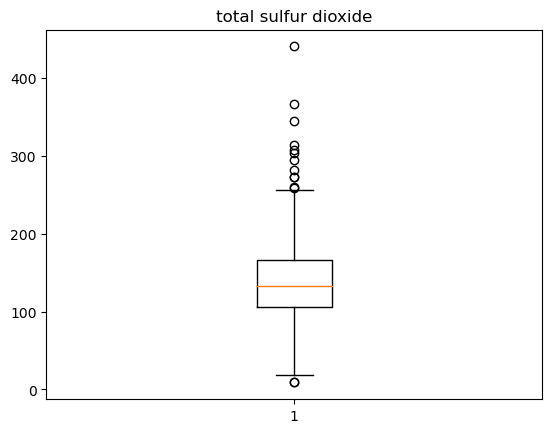

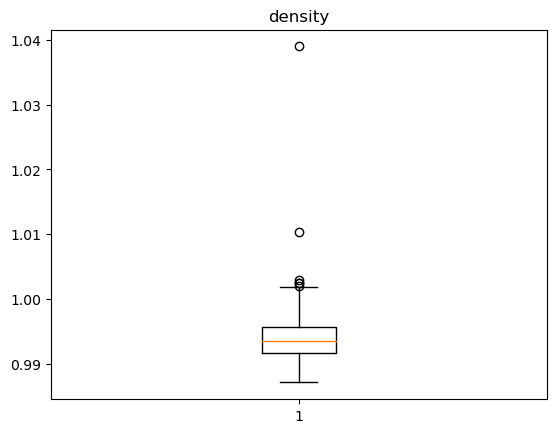

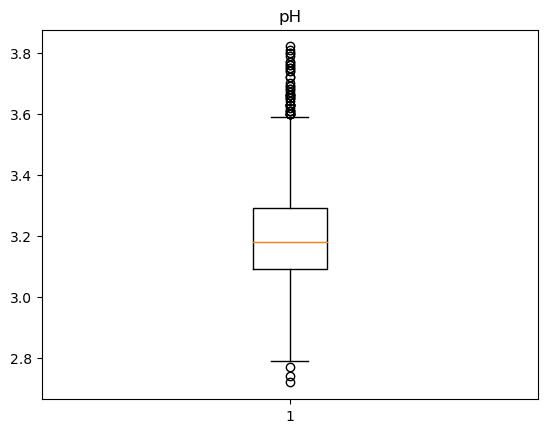

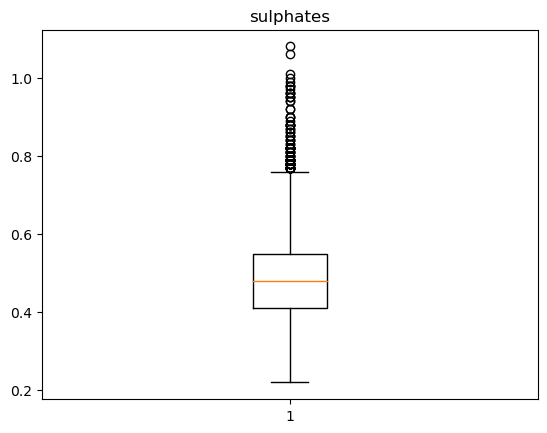

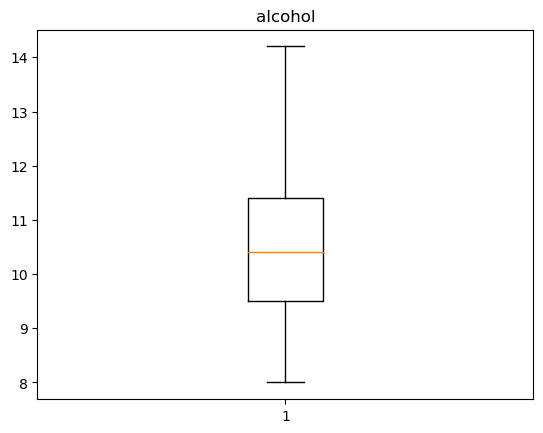

In [19]:
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for cols in columns:
    plt.boxplot(df[cols])
    plt.title(cols)
    plt.show()

In [20]:
Q1=df['fixed acidity'].quantile(0.25)
Q3=df['fixed acidity'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['fixed acidity']<lower_lim) | (df['fixed acidity']>upper_lim)]
outlier.shape

(106, 12)

In [21]:
Q1=df['volatile acidity'].quantile(0.25)
Q3=df['volatile acidity'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['volatile acidity']<lower_lim) | (df['volatile acidity']>upper_lim)]
outlier.shape

(133, 12)

In [22]:
Q1=df['citric acid'].quantile(0.25)
Q3=df['citric acid'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['citric acid']<lower_lim) | (df['citric acid']>upper_lim)]
outlier.shape

(223, 12)

In [23]:
Q1=df['residual sugar'].quantile(0.25)
Q3=df['residual sugar'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['residual sugar']<lower_lim) | (df['residual sugar']>upper_lim)]
outlier.shape

(16, 12)

In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
Q1=df['chlorides'].quantile(0.25)
Q3=df['chlorides'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['chlorides']<lower_lim) | (df['chlorides']>upper_lim)]
outlier.shape

(178, 12)

In [26]:
Q1=df['free sulfur dioxide'].quantile(0.25)
Q3=df['free sulfur dioxide'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['free sulfur dioxide']<lower_lim) | (df['free sulfur dioxide']>upper_lim)]
outlier.shape

(44, 12)

In [27]:
Q1=df['total sulfur dioxide'].quantile(0.25)
Q3=df['total sulfur dioxide'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['total sulfur dioxide']<lower_lim) | (df['total sulfur dioxide']>upper_lim)]
outlier.shape

(14, 12)

In [28]:
Q1=df['density'].quantile(0.25)
Q3=df['density'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['density']<lower_lim) | (df['density']>upper_lim)]
outlier.shape

(6, 12)

In [29]:
Q1=df['sulphates'].quantile(0.25)
Q3=df['sulphates'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['sulphates']<lower_lim) | (df['sulphates']>upper_lim)]
outlier.shape

(96, 12)

In [30]:
Q1=df['pH'].quantile(0.25)
Q3=df['pH'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
outlier=df[(df['pH']<lower_lim) | (df['pH']>upper_lim)]
outlier.shape

(46, 12)


## Define Target Variable (y) and Feature Variables (X)

In [31]:
x=df.drop('quality',axis=1)

In [32]:
y=df['quality']

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
st=StandardScaler()

In [35]:
x=st.fit_transform(x)

## Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

## Modeling

In [38]:
from sklearn.svm import SVC

In [39]:
svc=SVC()

In [40]:
svc.fit(x_train,y_train)

SVC()

In [41]:
predicted=svc.predict(x_test)

In [42]:
predicted.shape

(1189,)

In [43]:
predicted

array([6, 6, 6, ..., 6, 6, 6])

## Model Evaluation

In [44]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
print(accuracy_score(y_test,predicted))

0.5458368376787216


In [46]:
print(confusion_matrix(y_test,predicted))

[[  0   0   3   3   0   0   0]
 [  0   3  24  20   0   0   0]
 [  0   1 204 161   0   0   0]
 [  0   0  97 397  28   0   0]
 [  0   0   4 155  45   0   0]
 [  0   0   0  23  17   0   0]
 [  0   0   1   2   1   0   0]]


In [47]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.75      0.06      0.12        47
           5       0.61      0.56      0.58       366
           6       0.52      0.76      0.62       522
           7       0.49      0.22      0.31       204
           8       0.00      0.00      0.00        40
           9       0.00      0.00      0.00         4

    accuracy                           0.55      1189
   macro avg       0.34      0.23      0.23      1189
weighted avg       0.53      0.55      0.51      1189



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Prediction

In [48]:
df1=df.sample(1)

In [49]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3943,6.4,0.2,0.15,6.6,0.046,26.0,113.0,0.99408,2.99,0.58,9.9,6


In [50]:
df1.shape

(1, 12)

In [51]:
x1=df1.drop(['quality'],axis=1)

In [52]:
x1=st.fit_transform(x1)

In [53]:
y_predict=svc.predict(x1)

In [54]:
y_predict

array([6])

## Explaination

From the classification report, we can see that the SVM classifier is performing relatively well for classes 4, 5, and 6, with decent precision, recall, and F1-scores. However, it struggles to correctly classify classes 3, 7, 8, and 9, as indicated by very low precision, recall, and F1-scores for these classes.

The low accuracy and overall mediocre performance could be due to several reasons:

Class imbalance: The dataset may have an uneven distribution of samples across different classes, making it challenging for the classifier to learn from the minority classes effectively.
Feature selection: The features used for classification may not be informative enough to distinguish between different wine qualities.
Hyperparameter tuning: SVM classifiers have various hyperparameters that can significantly affect their performance. It's possible that better hyperparameter settings could improve the results.
Insufficient data: The dataset might not have enough instances to build a robust and accurate model.